## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## Import hotel_bookings.csv

In [2]:
hotel_bookings = pd.read_csv("../../Hotel Data/hotel_bookings.csv")
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
len(hotel_bookings)

119390

## Create columns

### Create "arrival_date" column and convert to datetime

In [5]:
hotel_bookings["arrival_date"] = hotel_bookings["arrival_date_day_of_month"].astype(str) + "-" + hotel_bookings["arrival_date_month"].astype(str) + "-" + hotel_bookings["arrival_date_year"].astype(str)
hotel_bookings["arrival_date"] = pd.to_datetime(hotel_bookings["arrival_date"])

Check date range of arrivals using numpy min, max

In [6]:
print(np.min(hotel_bookings["arrival_date"]))
print(np.max(hotel_bookings["arrival_date"]))

2015-07-01 00:00:00
2017-08-31 00:00:00


### Create "total_nights" column

In [7]:
hotel_bookings["total_nights"] = hotel_bookings["stays_in_weekend_nights"] + hotel_bookings["stays_in_week_nights"]

### Create "total_guests" column

In [8]:
# Children is a float rather than integer. Replace nulls and convert to integer
hotel_bookings['children'] = hotel_bookings['children'].fillna(0)
hotel_bookings["children"] = hotel_bookings["children"].astype(int)
# Sum adults, children and babies to get total_guests
hotel_bookings["total_guests"] = hotel_bookings["adults"] + hotel_bookings["children"] + hotel_bookings["babies"]

### Create "guest_type" column based on custom function

#### Custom function to define guest type i.e. large group, family, couple, individual traveller etc

In [9]:
def guest_type(hotel_bookings):
    total_guests = hotel_bookings['total_guests']
    adults = hotel_bookings['adults']
    if total_guests > 6:
        return("Large Group")
    elif total_guests == 1:
        return("Individual Traveller")
    elif total_guests == 0:
        return("Unknown")
    else:
        if adults != total_guests:
            return("Family")
        else:
            if total_guests == 2:
                return("Couple")
            else: 
                return("Group")

#### Apply custom function to DataFrame and print first 5 rows

In [10]:
hotel_bookings["guest_type"] = hotel_bookings.apply(guest_type, axis=1)
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests,guest_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,Couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2,Couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2,Couple


### Create "arrival_date_week_number_EC" and "arrival_date_year_EC" columns

This will be used later on for merging the data

In [11]:
hotel_bookings["arrival_date_week_number_EC"] = hotel_bookings["arrival_date"].dt.isocalendar().week
hotel_bookings["arrival_date_year_EC"] = hotel_bookings["arrival_date"].dt.isocalendar().year

## Import data from API

### API requests for public holidays in Portugal (PT) for 2015, 2016 & 2017

In [12]:
requests.get('https://date.nager.at/api/v3/publicholidays/2015/PT')
requests.get('https://date.nager.at/api/v3/publicholidays/2016/PT')
requests.get('https://date.nager.at/api/v3/publicholidays/2017/PT')

<Response [200]>

### Create pandas DataFrame for each year

In [13]:
holidays_portugal_2015 = requests.get('https://date.nager.at/api/v3/publicholidays/2015/PT')
holidays_portugal_2016 = requests.get('https://date.nager.at/api/v3/publicholidays/2016/PT')
holidays_portugal_2017 = requests.get('https://date.nager.at/api/v3/publicholidays/2017/PT')
holidays_portugal_2015 = pd.DataFrame(holidays_portugal_2015.json())
holidays_portugal_2016 = pd.DataFrame(holidays_portugal_2016.json())
holidays_portugal_2017 = pd.DataFrame(holidays_portugal_2017.json())

### Concatenate 2015, 2016 & 2017 holiday data

In [14]:
holidays_portugal = pd.concat([holidays_portugal_2015, holidays_portugal_2016, holidays_portugal_2017], ignore_index = True)
holidays_portugal.head()

,date,localName,name,countryCode,fixed,global,counties,launchYear,types
0,2015-01-01,Ano Novo,New Year's Day,PT,True,True,None,None,[Public]
1,2015-02-17,Carnaval,Carnival,PT,False,True,None,None,[Optional]
2,2015-04-03,Sexta-feira Santa,Good Friday,PT,False,True,None,None,[Public]
3,2015-04-05,Domingo de Páscoa,Easter Sunday,PT,False,True,None,None,[Public]
4,2015-04-25,Dia da Liberdade,Freedom Day,PT,True,True,None,None,[Public]


### Cleaning / reformatting holidays_portugal 

#### Dropping columns not needed from holidays_portugal

In [15]:
holidays_portugal = holidays_portugal.drop(['localName', 'countryCode', 'fixed', 'global', 'counties', 'launchYear', 'types'], axis = 1)

#### Renaming 'date' and 'name' to 'holiday_date' and 'holiday_name' using dictionary

In [16]:
holidays_portugal.rename(columns = {'date':'holiday_date', 'name':'holiday_name'}, inplace = True)
holidays_portugal.head()

,holiday_date,holiday_name
0,2015-01-01,New Year's Day
1,2015-02-17,Carnival
2,2015-04-03,Good Friday
3,2015-04-05,Easter Sunday
4,2015-04-25,Freedom Day


#### Changing data type of 'holiday_date' column

In [17]:
holidays_portugal["holiday_date"] = pd.to_datetime(holidays_portugal["holiday_date"])
holidays_portugal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   holiday_date  51 non-null     datetime64[ns]
 1   holiday_name  51 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 944.0+ bytes


#### Creating two new columns 'holiday_week_number' and 'holiday_year' as I want to join on a combination of week & year

In [18]:
holidays_portugal["holiday_week_number"] = holidays_portugal["holiday_date"].dt.isocalendar().week
holidays_portugal["holiday_year"] = holidays_portugal["holiday_date"].dt.isocalendar().year
holidays_portugal

,holiday_date,holiday_name,holiday_week_number,holiday_year
0,2015-01-01,New Year's Day,1,2015
1,2015-02-17,Carnival,8,2015
2,2015-04-03,Good Friday,14,2015
3,2015-04-05,Easter Sunday,14,2015
4,2015-04-25,Freedom Day,17,2015
5,2015-05-01,Labour Day,18,2015
6,2015-06-01,Azores Day,23,2015
7,2015-06-04,Corpus Christi,23,2015
8,2015-06-10,National Day,24,2015
9,2015-07-01,Madeira Day,27,2015


#### Manually dropping rows where there are multiple holidays in one week and creating DataFrame holidays_portugal_unique 

In [19]:
holidays_to_drop = holidays_portugal.query('(holiday_date == "2015-04-05") | (holiday_date == "2015-06-04") | (holiday_date == "2015-12-26") | (holiday_date == "2016-03-27") | (holiday_date == "2016-05-01") | (holiday_date == "2017-01-01") | (holiday_date == "2017-04-16") | (holiday_date == "2017-12-26")')
holidays_portugal_unique = holidays_portugal.drop(holidays_to_drop.index).reset_index(drop=True)

## Merge the data

#### Merge hotel_bookings DataFrame with holidays_portugal_unique DataFrame using left join. 
Join on ["arrival_date_year_EC", "arrival_date_week_number_EC"] and ["holiday_week_number", "holiday_year"] rather than "arrival_date" and "holiday_date"

In [20]:
hotel_bookings = hotel_bookings.merge(holidays_portugal_unique, how = "left", left_on=["arrival_date_year_EC", "arrival_date_week_number_EC"], right_on=["holiday_year", "holiday_week_number"])
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,arrival_date,total_nights,total_guests,guest_type,arrival_date_week_number_EC,arrival_date_year_EC,holiday_date,holiday_name,holiday_week_number,holiday_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,2015-07-01,0,2,Couple,27,2015,2015-07-01,Madeira Day,27,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,2015-07-01,0,2,Couple,27,2015,2015-07-01,Madeira Day,27,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,2015-07-01,1,1,Individual Traveller,27,2015,2015-07-01,Madeira Day,27,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,2015-07-01,1,1,Individual Traveller,27,2015,2015-07-01,Madeira Day,27,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,2015-07-01,2,2,Couple,27,2015,2015-07-01,Madeira Day,27,2015


In [21]:
len(hotel_bookings)

119390

### Create "is_holiday week" column

#### Fill NAs in 'holiday_name' column with 'No holiday'. Then use lambda function to create 'is_holiday_week' column

In [22]:
hotel_bookings[["holiday_name"]] = hotel_bookings[["holiday_name"]].fillna("No holiday")
hotel_bookings["is_holiday_week"] = hotel_bookings.apply(lambda x: '0' if x['holiday_name'] == "No holiday" else 1, axis=1)
hotel_bookings['is_holiday_week'] = hotel_bookings['is_holiday_week'].astype(int)
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_nights,total_guests,guest_type,arrival_date_week_number_EC,arrival_date_year_EC,holiday_date,holiday_name,holiday_week_number,holiday_year,is_holiday_week
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,2,Couple,27,2015,2015-07-01,Madeira Day,27,2015,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,2,Couple,27,2015,2015-07-01,Madeira Day,27,2015,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1,1,Individual Traveller,27,2015,2015-07-01,Madeira Day,27,2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1,1,Individual Traveller,27,2015,2015-07-01,Madeira Day,27,2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,2,2,Couple,27,2015,2015-07-01,Madeira Day,27,2015,1


## Cleaning the data

### Dropping columns not relevant to my analysis

In [23]:
hotel_bookings = hotel_bookings.drop(
    ['arrival_date_month', 
     'arrival_date_year',
     'arrival_date_week_number',
     'arrival_date_day_of_month',
     'stays_in_weekend_nights',
     'stays_in_week_nights',
     'adults', 
     'children', 
     'babies',
     'meal', 
     'market_segment', 
     'distribution_channel', 
     'is_repeated_guest', 
     'previous_cancellations',
     'previous_bookings_not_canceled',
     'reserved_room_type', 
     'assigned_room_type', 
     'booking_changes',
     'deposit_type',
     'agent', 
     'company', 
     'days_in_waiting_list', 
     'customer_type', 
     'required_car_parking_spaces', 
     'total_of_special_requests', 
     'holiday_week_number', 
     'holiday_year'], axis=1)

In [26]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   hotel                        119390 non-null  object        
 1   is_canceled                  119390 non-null  int64         
 2   lead_time                    119390 non-null  int64         
 3   arrival_date_month           119390 non-null  object        
 4   country                      118902 non-null  object        
 5   adr                          119390 non-null  float64       
 6   reservation_status           119390 non-null  object        
 7   reservation_status_date      119390 non-null  object        
 8   arrival_date                 119390 non-null  datetime64[ns]
 9   total_nights                 119390 non-null  int64         
 10  total_guests                 119390 non-null  int64         
 11  guest_type                

### Replacing nulls

In [27]:
hotel_bookings.isnull().sum()

hotel                              0
is_canceled                        0
lead_time                          0
arrival_date_month                 0
country                          488
adr                                0
reservation_status                 0
reservation_status_date            0
arrival_date                       0
total_nights                       0
total_guests                       0
guest_type                         0
arrival_date_week_number_EC        0
arrival_date_year_EC               0
holiday_date                   85157
holiday_name                       0
is_holiday_week                    0
dtype: int64

### Replacing nulls

In [27]:
hotel_bookings["country"] = hotel_bookings["country"].fillna("Unknown")
hotel_bookings[["holiday_date"]] = hotel_bookings[["holiday_date"]].fillna("")
hotel_bookings.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_month             0
country                        0
adr                            0
reservation_status             0
reservation_status_date        0
arrival_date                   0
total_nights                   0
total_guests                   0
guest_type                     0
arrival_date_week_number_EC    0
arrival_date_year_EC           0
holiday_date                   0
holiday_name                   0
is_holiday_week                0
dtype: int64

#### Drop rows where 'total_nights' or 'total_guests' or 'adr' (average daily rate) is 0. 

In [28]:
rows_to_drop = hotel_bookings.query('(total_nights == 0) | (total_guests == 0) | (adr == 0)')
hotel_bookings = hotel_bookings.drop(rows_to_drop.index)
len(hotel_bookings)

117400

#### Change incorrect data types

In [29]:
hotel_bookings["reservation_status_date"] = pd.to_datetime(hotel_bookings["reservation_status_date"])
hotel_bookings["holiday_date"] = pd.to_datetime(hotel_bookings["holiday_date"])

## Filter hotel_bookings to create canceled / non_canceled DataFrames which will be used throughout 

In [30]:
hotel_bookings_canceled = hotel_bookings[hotel_bookings["is_canceled"]==1].copy()
hotel_bookings_not_canceled = hotel_bookings[hotel_bookings["is_canceled"]==0].copy()

## Analysis on cancelations

#### Number of not canceled (0) vs canceled (1) bookings

In [32]:
hotel_bookings['is_canceled'].value_counts()

0    73389
1    44011
Name: is_canceled, dtype: int64

#### Plot of not canceled (0) vs canceled (1) bookings per hotel type

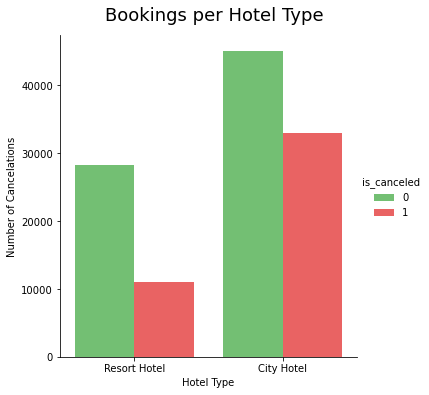

In [106]:
g = sns.catplot(data = hotel_bookings, x = "hotel", kind = "count", hue = "is_canceled", palette = {0:"#66cc66", 1:"#ff4d4d"})
g.fig.suptitle("Bookings per Hotel Type", y = 1.05, size = 18)
g.set(xlabel = "Hotel Type", ylabel = "Number of Cancelations")
plt.show()

#### Cancelations per hotel per week

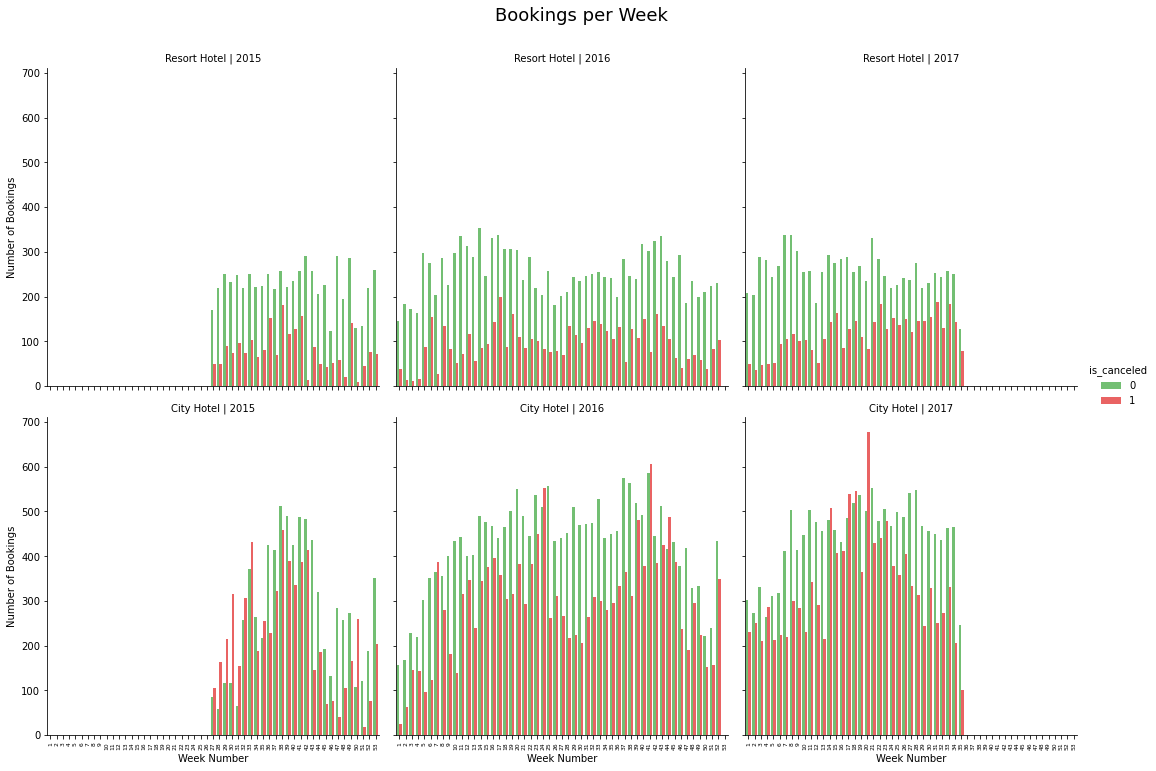

In [107]:
g = sns.catplot(data = hotel_bookings, x = "arrival_date_week_number_EC", row = "hotel", col = "arrival_date_year_EC", kind = "count", hue = "is_canceled", palette = {0:"#66cc66", 1:"#ff4d4d"})
g.fig.suptitle("Bookings per Week", y = 1.05, fontsize = 18)
g.set_titles("{row_name} | {col_name}")
g.set_xlabels("Week Number")
g.set_ylabels("Number of Bookings")
g.set_xticklabels(fontsize = 6, rotation = 90)
plt.show()

### Create "cancelation_period" column

Create cancelation period column based on difference between arrival_date and reservatio_status_date when reservation_status = Canceled

In [52]:
hotel_bookings_canceled["cancelation_period"] = hotel_bookings_canceled["arrival_date"] - hotel_bookings_canceled["reservation_status_date"]
hotel_bookings_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_month,country,adr,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests,guest_type,arrival_date_week_number_EC,arrival_date_year_EC,holiday_date,holiday_name,is_holiday_week,cancelation_period
8,Resort Hotel,1,85,July,PRT,82.0,Canceled,2015-05-06,2015-07-01,3,2,Couple,27,2015,2015-07-01,Madeira Day,1,56 days
9,Resort Hotel,1,75,July,PRT,105.5,Canceled,2015-04-22,2015-07-01,3,2,Couple,27,2015,2015-07-01,Madeira Day,1,70 days
10,Resort Hotel,1,23,July,PRT,123.0,Canceled,2015-06-23,2015-07-01,4,2,Couple,27,2015,2015-07-01,Madeira Day,1,8 days
27,Resort Hotel,1,60,July,PRT,107.0,Canceled,2015-05-11,2015-07-01,7,2,Couple,27,2015,2015-07-01,Madeira Day,1,51 days
32,Resort Hotel,1,96,July,PRT,108.3,Canceled,2015-05-29,2015-07-01,10,2,Couple,27,2015,2015-07-01,Madeira Day,1,33 days


In [53]:
# Convert cancelation period to float
hotel_bookings_canceled["cancelation_period"] = hotel_bookings_canceled["cancelation_period"].astype('timedelta64[D]')
hotel_bookings_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_month,country,adr,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests,guest_type,arrival_date_week_number_EC,arrival_date_year_EC,holiday_date,holiday_name,is_holiday_week,cancelation_period
8,Resort Hotel,1,85,July,PRT,82.0,Canceled,2015-05-06,2015-07-01,3,2,Couple,27,2015,2015-07-01,Madeira Day,1,56.0
9,Resort Hotel,1,75,July,PRT,105.5,Canceled,2015-04-22,2015-07-01,3,2,Couple,27,2015,2015-07-01,Madeira Day,1,70.0
10,Resort Hotel,1,23,July,PRT,123.0,Canceled,2015-06-23,2015-07-01,4,2,Couple,27,2015,2015-07-01,Madeira Day,1,8.0
27,Resort Hotel,1,60,July,PRT,107.0,Canceled,2015-05-11,2015-07-01,7,2,Couple,27,2015,2015-07-01,Madeira Day,1,51.0
32,Resort Hotel,1,96,July,PRT,108.3,Canceled,2015-05-29,2015-07-01,10,2,Couple,27,2015,2015-07-01,Madeira Day,1,33.0


#### Custom function to group cancelations

In [54]:
def cancelations_grouped(hotel_bookings_canceled):
    cancelation_period = hotel_bookings_canceled["cancelation_period"]
    if cancelation_period > 90:
        return("> 90 days")
    elif cancelation_period > 30:
        return("> 30 days")
    elif cancelation_period > 7:
        return("> 7 days")
    elif cancelation_period > 2:
        return("Same week")
    elif cancelation_period > 1:
        return("48 hours")
    elif cancelation_period > 0:
        return ("24 hours")
    else:
        return ("Same day")

#### Apply to dataframe

In [55]:
hotel_bookings_canceled["cancelations_grouped"] = hotel_bookings_canceled.apply(cancelations_grouped, axis=1)
hotel_bookings_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_month,country,adr,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests,guest_type,arrival_date_week_number_EC,arrival_date_year_EC,holiday_date,holiday_name,is_holiday_week,cancelation_period,cancelations_grouped
8,Resort Hotel,1,85,July,PRT,82.0,Canceled,2015-05-06,2015-07-01,3,2,Couple,27,2015,2015-07-01,Madeira Day,1,56.0,> 30 days
9,Resort Hotel,1,75,July,PRT,105.5,Canceled,2015-04-22,2015-07-01,3,2,Couple,27,2015,2015-07-01,Madeira Day,1,70.0,> 30 days
10,Resort Hotel,1,23,July,PRT,123.0,Canceled,2015-06-23,2015-07-01,4,2,Couple,27,2015,2015-07-01,Madeira Day,1,8.0,> 7 days
27,Resort Hotel,1,60,July,PRT,107.0,Canceled,2015-05-11,2015-07-01,7,2,Couple,27,2015,2015-07-01,Madeira Day,1,51.0,> 30 days
32,Resort Hotel,1,96,July,PRT,108.3,Canceled,2015-05-29,2015-07-01,10,2,Couple,27,2015,2015-07-01,Madeira Day,1,33.0,> 30 days


#### Graph

In [58]:
cancelations_grouped_order = ["> 90 days", "> 30 days", "> 7 days", "Same week", "48 hours", "24 hours", "Same day"]

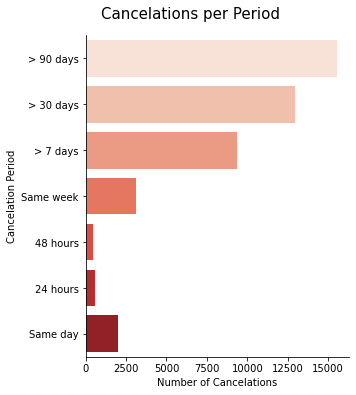

In [99]:
g = sns.catplot(data = hotel_bookings_canceled, y = "cancelations_grouped", kind = "count", order = cancelations_grouped_order, palette = "Reds")
g.fig.suptitle("Cancelations per Period", y = 1.05, fontsize = 15)
g.set(xlabel = "Number of Cancelations", ylabel = "Cancelation Period")
plt.show()

### General stats on the data

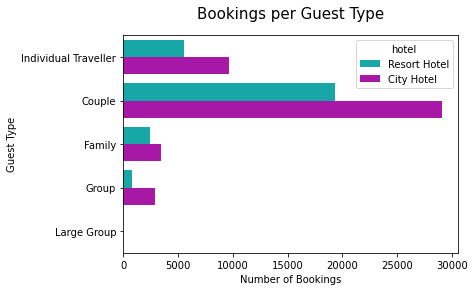

In [100]:
# Creating a list to order the groups
guest_type_order = ["Individual Traveller", "Couple", "Group", "Family", "Large Group", "Other"]
g = sns.countplot(data = hotel_bookings_not_canceled, y = 'guest_type', hue = 'hotel', palette = {"Resort Hotel" : "c", "City Hotel": "m"})
g.set_title("Bookings per Guest Type", y = 1.05, fontsize = 15)
g.set(xlabel = "Number of Bookings", ylabel = "Guest Type")
plt.show()

In [59]:
hotel_bookings_not_canceled.groupby("guest_type")["total_nights"].count().sort_values(ascending = False)

guest_type
Couple                  48411
Individual Traveller    15253
Family                   5966
Group                    3757
Large Group                 2
Name: total_nights, dtype: int64

In [68]:
# Filter for total_nights <= 14 so see the data more clearly
normal_length_stay = hotel_bookings[hotel_bookings["total_nights"]<=14]

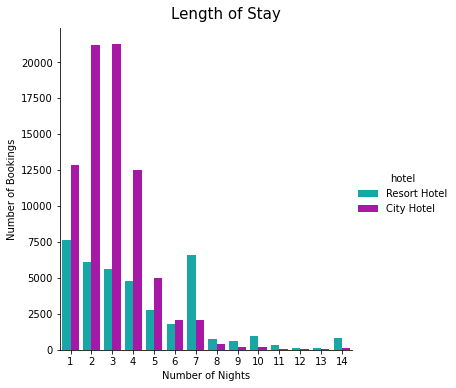

In [102]:
g = sns.catplot(data = normal_length_stay, x="total_nights", hue = "hotel", kind = "count", palette = {"Resort Hotel" : "c", "City Hotel": "m"})
g.fig.suptitle("Length of Stay", y = 1.03, fontsize = 15)
g.set(xlabel = "Number of Nights", ylabel = "Number of Bookings")
plt.show()

## Analysis by Country

#### Using groupby to get number of arrivals per country and sort_values and slicing to get top 10 countries

In [72]:
arrivals_per_country = hotel_bookings_not_canceled.groupby("country")["arrival_date"].count().sort_values(ascending = False)
arrivals_per_country_10 = pd.DataFrame(arrivals_per_country[0:10])
arrivals_per_country_10

,arrival_date
country,
PRT,19695
GBR,9602
FRA,8427
ESP,6312
DEU,6028
IRL,2537
ITA,2417
BEL,1862
NLD,1712


#### Create top_10_countries DataFrame by filtering hotel_bookings for any country in the top 10
#### Use catplot() to create horizontal barplot/count plot

In [74]:
top_10_countries = hotel_bookings_not_canceled[hotel_bookings_not_canceled["country"].isin(arrivals_per_country_10.index)]

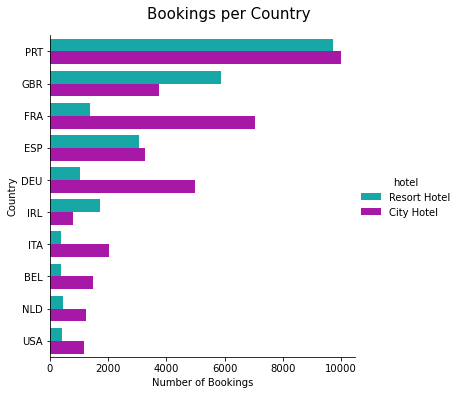

In [103]:
g = sns.catplot(data=top_10_countries, y="country", kind = "count", hue="hotel", order = top_10_countries['country'].value_counts().index, palette = {"Resort Hotel" : "c", "City Hotel": "m"})
g.fig.suptitle("Bookings per Country", y = 1.05, fontsize = 15)
g.set(xlabel = "Number of Bookings", ylabel = "Country")
plt.show()

## Analysis per week

### Create catplot() to view arrivals per week in each hotel

In [ ]:
# Using not canceled bookings / actual arrivals

### Add hue = "is_holiday_week" to the above graph

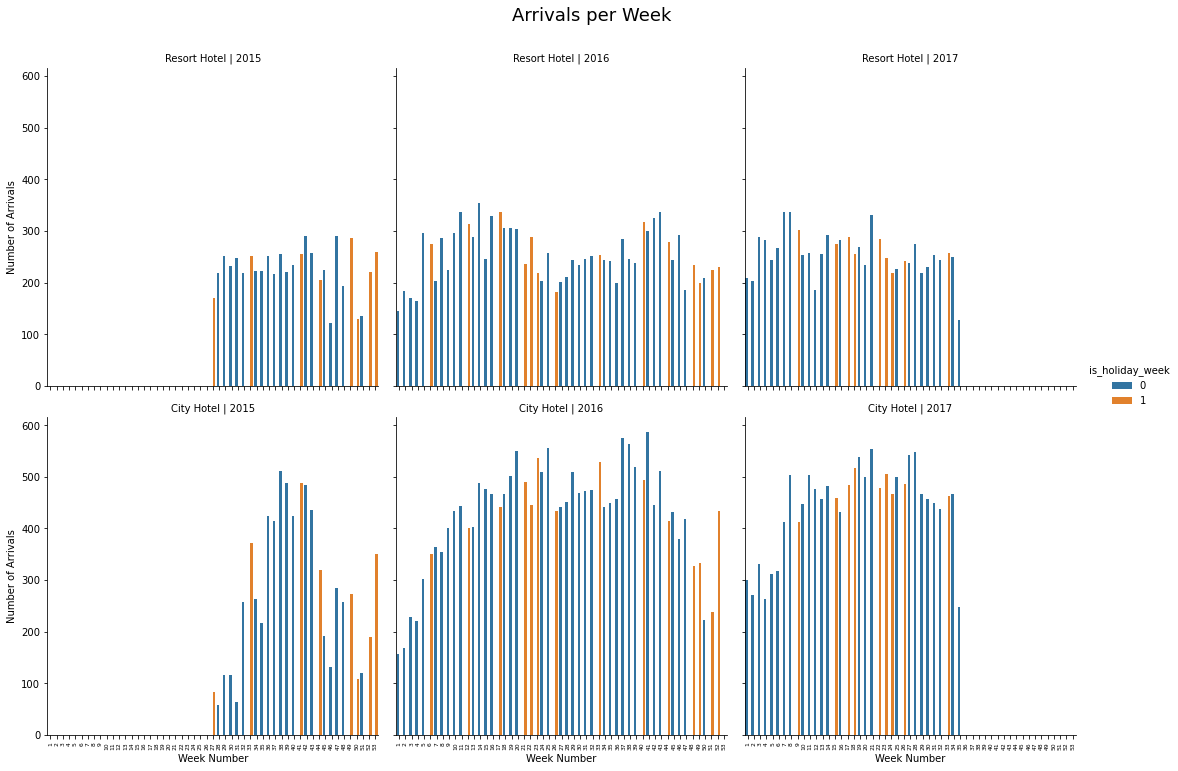

In [104]:
g = sns.catplot(data = hotel_bookings_not_canceled, x="arrival_date_week_number_EC", kind = "count", hue = "is_holiday_week", row = "hotel", col = "arrival_date_year_EC")
g.fig.suptitle("Arrivals per Week", y = 1.05, fontsize = 18)
g.set_titles("{row_name} | {col_name}")
g.set_xlabels("Week Number")
g.set_ylabels("Number of Arrivals")
g.set_xticklabels(fontsize=6, rotation=90)
plt.show()

## Analysis on Average Daily Rate (price per night)

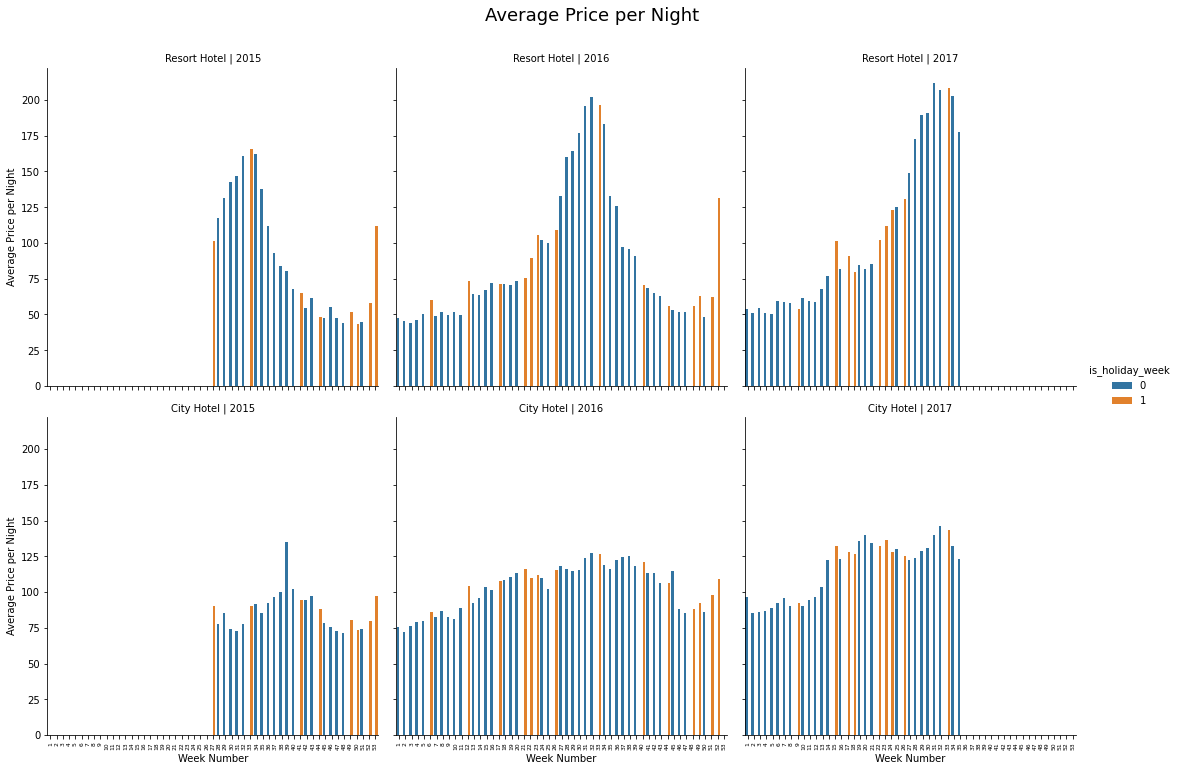

In [105]:
# Price per night (weekly) per hotel
g = sns.catplot(x="arrival_date_week_number_EC", y="adr", col = "arrival_date_year_EC", row = "hotel", hue = "is_holiday_week", data=hotel_bookings_not_canceled, kind = "bar", ci = None)
g.fig.suptitle("Average Price per Night", y = 1.05, fontsize = 18)
g.set_titles("{row_name} | {col_name}")
g.set_xlabels("Week Number")
g.set_ylabels("Average Price per Night")
g.set_xticklabels(fontsize=6, rotation=90)
plt.show()

In [124]:
hotel_bookings_not_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_month,country,adr,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests,guest_type,arrival_date_week_number_EC,arrival_date_year_EC,holiday_date,holiday_name,is_holiday_week
2,Resort Hotel,0,7,July,GBR,75.0,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller,27,2015,2015-07-01,Madeira Day,1
3,Resort Hotel,0,13,July,GBR,75.0,Check-Out,2015-07-02,2015-07-01,1,1,Individual Traveller,27,2015,2015-07-01,Madeira Day,1
4,Resort Hotel,0,14,July,GBR,98.0,Check-Out,2015-07-03,2015-07-01,2,2,Couple,27,2015,2015-07-01,Madeira Day,1
5,Resort Hotel,0,14,July,GBR,98.0,Check-Out,2015-07-03,2015-07-01,2,2,Couple,27,2015,2015-07-01,Madeira Day,1
6,Resort Hotel,0,0,July,PRT,107.0,Check-Out,2015-07-03,2015-07-01,2,2,Couple,27,2015,2015-07-01,Madeira Day,1
